## Gempy Model Notebook BuFaTa

In [1]:
import os
#Run this cell only if you want to run gempy in cuda mode (requires cuda and a dedicated cpu).
#Initial compilation will take a bit longer but the model will run much faster 
os.environ["THEANO_FLAGS"] = "mode=FAST_RUN,device=cuda"


In [2]:
import gempy as gp
import pandas as pd

No module named 'osgeo'
Not subsurface compatibility available


WARNING (theano.configdefaults): install mkl with `conda install mkl-service`: No module named 'mkl'
ERROR (theano.gpuarray): Could not initialize pygpu, support disabled
Traceback (most recent call last):
  File "/home/daniel/anaconda3/envs/sandbox-env/lib/python3.7/site-packages/theano/gpuarray/__init__.py", line 227, in <module>
    use(config.device)
  File "/home/daniel/anaconda3/envs/sandbox-env/lib/python3.7/site-packages/theano/gpuarray/__init__.py", line 214, in use
    init_dev(device, preallocate=preallocate)
  File "/home/daniel/anaconda3/envs/sandbox-env/lib/python3.7/site-packages/theano/gpuarray/__init__.py", line 99, in init_dev
    **args)
  File "pygpu/gpuarray.pyx", line 658, in pygpu.gpuarray.init
  File "pygpu/gpuarray.pyx", line 587, in pygpu.gpuarray.pygpu_init
pygpu.gpuarray.GpuArrayException: b'Could not load "libnvrtc.so": libnvrtc.so: cannot open shared object file: No such file or directory'


## Load data

In [3]:
# load input data
orientations = pd.read_csv("orientations_BuFaTa").drop(['Unnamed: 0'],axis=1)
orientations


,index,X,Y,Z,formation,dip,azimuth,polarity
0,0,96.471041,451.563621,441.094095,Ton,30.5,180.0,1
1,1,172.761009,661.876505,556.867380,Ton,30.5,180.0,1
2,2,383.073893,957.757866,722.911087,Ton,30.5,180.0,1
3,3,592.355831,722.702290,601.566862,Ton,30.5,180.0,1
4,4,766.585622,348.469070,378.006473,Ton,30.5,180.0,1
5,5,843.906535,167.022661,277.636299,Ton,30.5,180.0,1
6,6,941.846359,428.882820,425.846281,Ton,30.5,180.0,1
7,7,22.142208,299.552757,387.829132,Ton,30.5,180.0,1


In [4]:
interfaces = pd.read_csv("interfaces_BuFaTa").drop(['Unnamed: 0'],axis=1)
interfaces

,index,X,Y,Z,formation
0,0,0.256327,264.862147,387.256441,Sand1
1,0,10.593468,276.733708,387.136342,Sand1
2,0,17.134940,289.089822,387.379871,Sand1
3,0,19.150128,293.313485,387.523852,Sand1
4,0,27.795117,310.571693,388.501235,Sand1
...,...,...,...,...,...
126,2,636.023304,859.787827,616.676190,Ton
127,2,608.850959,912.396263,647.803661,Ton
128,2,560.109925,990.617267,696.266604,Ton
129,2,526.375318,1045.388234,716.806593,Ton


## Initialize the model

In [5]:
# create model
geo_model = gp.create_model("BuFaTa_Example")
geo_model

BuFaTa_Example  2021-12-13 23:32

In [6]:
# init model
gp.init_data(geo_model, [0, 972, 0, 1069, 300, 800], [5, 20, 10],
             surface_points_df = interfaces,
             orientations_df = orientations,
             default_values=True)

Active grids: ['regular']


BuFaTa_Example  2021-12-13 23:32

In [7]:
gp.map_stack_to_surfaces(geo_model,
                         {"Default_Series": ('Sand1','Ton')},
                         remove_unused_series=True)
geo_model.add_surfaces('basement')

,surface,series,order_surfaces,color,id
0,Sand1,Default_Series,1,#015482,1
1,Ton,Default_Series,2,#9f0052,2
2,basement,Default_Series,3,#ffbe00,3


In [8]:
gp.set_interpolator(geo_model,
                    compile_theano=True,
                    theano_optimizer='fast_compile',
                    verbose=[],
                    update_kriging = False
                    )

Compiling theano function...
Level of Optimization:  fast_compile
Device:  cuda
Precision:  float32
Number of faults:  0
Compilation Done!
Kriging values: 
                        values
range             1528.903202
$C_o$            55655.833333
drift equations           [3]


In [9]:
geo_model.set_topography() #TODO: install GDAL

[700. 800.]
Active grids: ['regular' 'topography']


Grid Object. Values: 
array([[  97.2       ,   26.725     ,  325.        ],
       [  97.2       ,   26.725     ,  375.        ],
       [  97.2       ,   26.725     ,  425.        ],
       ...,
       [ 972.        ,  956.47368421,  760.08433129],
       [ 972.        , 1012.73684211,  762.79633604],
       [ 972.        , 1069.        ,  756.41619339]])

In [10]:
sol = gp.compute_model(geo_model, compute_mesh=True)

/home/daniel/anaconda3/envs/sandbox-env/lib/python3.7/site-packages/theano/tensor/slinalg.py:255: LinAlgWarning: Ill-conditioned matrix (rcond=1.48016e-09): result may not be accurate.
  rval = scipy.linalg.solve(A, b)


/home/daniel/anaconda3/envs/sandbox-env/lib/python3.7/site-packages/gempy/plot/plot_api.py:261: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  p.fig.show()


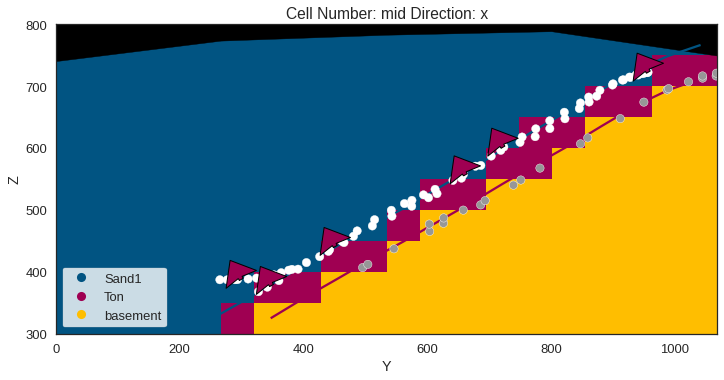

In [11]:
gp.plot_2d(geo_model, direction='x', show_topography=True)

/home/daniel/anaconda3/envs/sandbox-env/lib/python3.7/site-packages/gempy/plot/plot_api.py:261: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  p.fig.show()


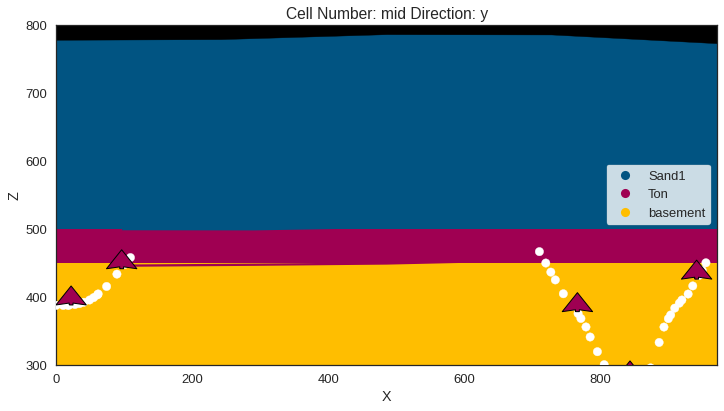

In [12]:
gp.plot_2d(geo_model, direction='y', show_topography=True)

2021-12-13 23:33:40.107 (  96.021s) [        2E9F3740]       vtkThreshold.cxx:84    WARN| vtkThreshold::ThresholdByUpper was deprecated for VTK 9.1 and will be removed in a future version.
/home/daniel/anaconda3/envs/sandbox-env/lib/python3.7/site-packages/pyvista/jupyter/notebook.py:60: UserWarning: Failed to use notebook backend: 

Please install `ipyvtklink` to use this feature: https://github.com/Kitware/ipyvtklink

Falling back to a static output.
  warnings.warn(f'Failed to use notebook backend: \n\n{e}\n\n'


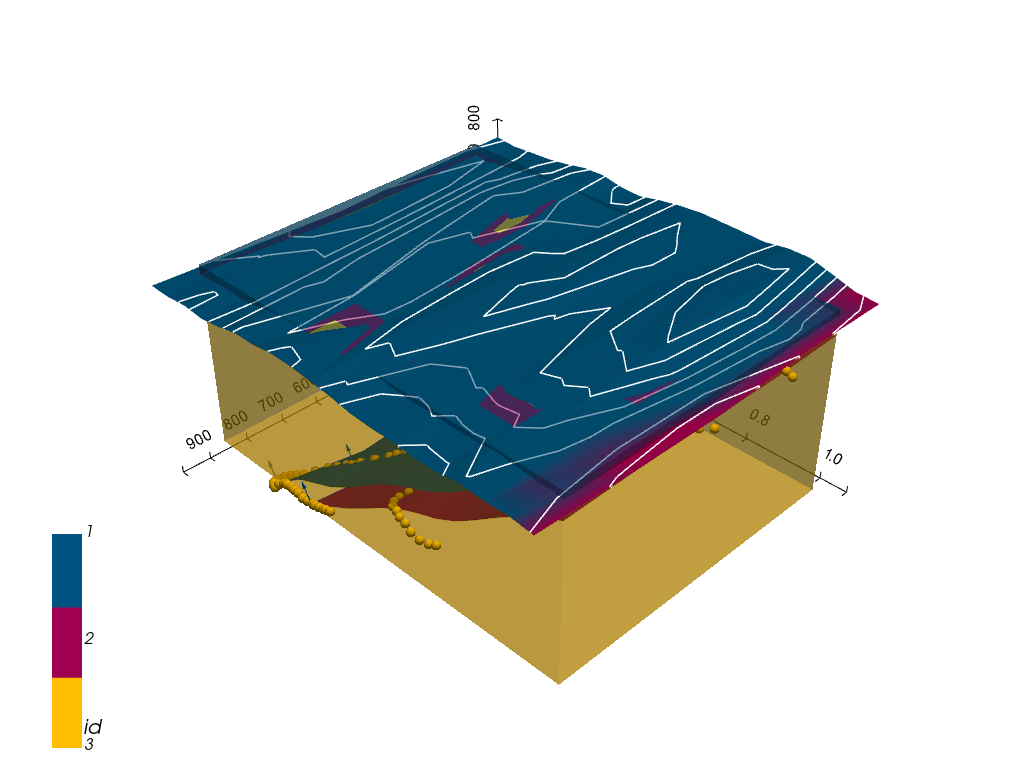

In [13]:
gpv = gp.plot_3d(geo_model, image=False, show_topography=True,
                 plotter_type='basic', notebook=True, show_lith=True)

## Initialize Sensor and Projector

In [14]:
#save the paths to the calibration files 
from sandbox import _calibration_dir
_calibprojector = _calibration_dir + "my_projector_calibration.json"
_calibsensor = _calibration_dir + "my_sensor_calibration.json"

In [15]:
#Import Sensor
from sandbox.sensor import Sensor
sensor = Sensor(calibsensor=_calibsensor, name="dummy")

sandbox.sensor.sensor_api: INFO | JSON configuration loaded for sensor.
sandbox.sensor.dummy: INFO | DummySensor initialized.


In [16]:
# Import projector
from sandbox.projector import Projector
projector = Projector(calibprojector=_calibprojector)

sandbox.projector.projector: INFO | JSON configuration loaded for projector


Launching server at http://localhost:37283
sandbox.projector.projector: INFO | Projector initialized and server started.
Please position the browser window accordingly and enter fullscreen!


In [17]:
#Initialize the aruco detection
from sandbox.markers import MarkerDetection
aruco = MarkerDetection(sensor=sensor)

sandbox.markers.aruco: INFO | Using dummy arucos. Create your own aruco positions using .set_aruco_position() function
sandbox.markers.aruco: INFO | using dummy aruco module
sandbox.markers.aruco: INFO | Aruco module loaded
sandbox.markers.markers_plotting: INFO | Aruco detection ready


In [18]:
from sandbox.main_thread import MainThread
main = MainThread(sensor=sensor, projector=projector, aruco=aruco)

sandbox.projector.contourlines: INFO | ContourLinesModule loaded successfully
sandbox.projector.shading: INFO | LightSource set to address RWTH Aachen, Germany at datetime Mon Dec 13 22:33:53 2021
sandbox.projector.cmap: INFO | CmapModule loaded successfully


In [19]:
# Start the thread 
main.run()

sandbox.main_thread: INFO | Thread started or resumed...


In [20]:
main.widget_plot_module()

Tabs
    [0] Column
        [0] Markdown(str)
        [1] Row
            [0] Column
                [0] Column
                    [0] Markdown(str)
                    [1] Checkbox(name='Show colormap', value=True)
                    [2] Select(name='Choose a colormap', options=['gist_earth', ...], value='gist_earth')
                    [3] Column
                        [0] Markdown(str)
                        [1] Checkbox(name='Show relief shading', value=True)
                        [2] Tabs
                            [0] WidgetBox
                                [0] Checkbox(name='Manual configuration')
                                [1] FloatSlider(end=360.0, name='Azimuth', value=333.17373011933324)
                                [2] FloatSlider(end=90.0, name='Altitude', value=-60.34315259446248)
                                [3] FloatInput(name='Vertical Exageration', step=0.01, value=0.25)
                            [1] WidgetBox
                                [0] TextInput(name='Enter address (e.g. City,..., value='RWTH Aachen, Germany')
                                [1] DatePicker(name='Select date (UTC +0)', value=datetime.date(2021, ...)
                                [2] Row(width_policy='min')
                                    [0] IntSlider(end=23, name='Hour', value=22, width_policy='min')
                                    [1] IntSlider(end=59, name='Minute', value=33, width_policy='min')
                                    [2] IntSlider(end=59, name='Second', value=53, width_policy='min')
                                [3] Markdown(str, sizing_mode='scale_width')
                                [4] Markdown(str, sizing_mode='scale_width')
                                [5] Markdown(str, sizing_mode='scale_width')
                                [6] Markdown(str, sizing_mode='scale_width')
                            [2] WidgetBox
                                [0] Checkbox(name='Start day simulation i...)
                [1] Column
                    [0] Markdown(str)
                    [1] Checkbox(name='Active contours', value=True)
                    [2] Checkbox(name='Automatic levels f...)
                    [3] Markdown(str)
                    [4] WidgetBox
                        [0] Checkbox(name='Show major contours', value=True)
                        [1] IntInput(name='Choose a contour step', value=100)
                        [2] Checkbox(name='Show minor contours', value=True)
                        [3] IntInput(name='Choose a minor c..., value=50)
                        [4] Checkbox(name='Show contours label', value=True)
                        [5] IntInput(name='set a contour l..., value=15)
            [1] Column
                [0] Column
                    [0] Markdown(str)
                    [1] Checkbox(name='Aruco Detection', value=True)
                    [2] Column
                        [0] Markdown(str)
                        [1] Row
                            [0] WidgetBox
                                [0] Checkbox(name='Show aruco location', value=True)
                                [1] Checkbox(name='Show aruco id', value=True)
                                [2] Checkbox(name='Show line connecting a...)
                                [3] ColorPicker(name='Color', value='#ff0000')
                            [1] WidgetBox
                                [0] Markdown(str)
                                [1] Row
                                    [0] IntInput(name='id', value=1, width=70)
                                    [1] IntInput(name='x coordinate', value=50, width=70)
                                    [2] IntInput(name='y coordinate', value=50, width=70)
                                [2] Button(button_type='success', name='Add dummy aruco dict')
                                [3] Button(button_type='warning', name='Clear aruco dict')
                [1] Column
                    [0] Markdown(str)
                    [1] RadioB

## Initialize the gempy module 

In [21]:
main.stop()
from sandbox.modules.gempy import GemPyModule
gpsb= GemPyModule(geo_model = geo_model, 
                  extent = sensor.extent, 
                  box=sensor.physical_dimensions, 
                  load_examples = False,
                 )

/home/daniel/anaconda3/envs/sandbox-env/lib/python3.7/site-packages/theano/tensor/slinalg.py:255: LinAlgWarning: Ill-conditioned matrix (rcond=1.48016e-09): result may not be accurate.
  rval = scipy.linalg.solve(A, b)


scale in Model units/ mm (X,Y,Z): [0.972, 1.33625, 1.5625]
the shown extent is [0.0, 972.0, 0.0, 1069.0] 
Active grids: ['regular' 'topography' 'sections']
sandbox.modules.gempy.gempy_module: INFO | GemPyModule loaded successfully


In [22]:
main.add_module(name='gempy', module=gpsb)
main.run()

sandbox.main_thread: INFO | module gempy added to modules


In [23]:
#Turn on Hill Shading
gpsb.show_hillshades = True
gpsb.show_lith = True
gpsb.show_boundary = True
gpsb.show_contour = False
gpsb.show_only_faults = False
gpsb.show_fill_contour = False


In [24]:





main.stop()

sandbox.main_thread: INFO | Thread stopped.
